# Introduction

Impedance is an important tool for analyzing AC circuits, especially those with
inductors and/or capacitors. In this lab, we learn some basic principles about
impedance, including phase shifting and the difference between the impedance of
capacitors and inductors.  

# Part 1

Notes: It was easier to measure the phase difference when the 100 ohm resistor
was used in place of the 1000 ohm resistor for the capacitor and vice versa for
the inductor.

## Problem 1

![Capacitor Circuit](cap_circuit.jpg)

![Capacitor Oscilloscope](one.png)

## Problem 2

The table is printed out in Python, so I don't have to have two copies of the
data.



In [33]:
from math import *

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Recorded and calculated data

freq = np.array([100, 1e3, 10e3, 100e3, 200e3, 500e3, 1e6, 2e6])  # Hz
v_in = np.array([4.9982, 4.9949, 5.0062, 4.9731, 4.9618, 4.9429, 4.8748, 4.9448])  # V
v_c = np.array([4.9949, 4.9968, 5.0359, 4.2939, 3.2303, 1.6595, 0.89385, 0.44316])  # V
v_r = np.array([0.0023, 0.0208, 0.2547, 2.4556, 3.6433, 4.2735, 4.8445, 4.7784])  # V
i = v_r / 100  # 100 ohms, instead of 1k ohms
z = v_c / i  # ohms
period = np.array(
    [10e-3, 1e-3, 100.00e-6, 10.003e-6, 4.9997e-6, 1.9979e-6, 1.0016e-6, 498.62e-9]
)  # s
delta_t = np.array(
    [
        -1.482e-3,
        -229.011e-6,
        -24.424e-6,
        -2.378e-6,
        -1.173e-6,
        -418.77e-9,
        -219.09e-9,
        -89.49e-9,
    ]
)  # s
phase_diff = 360 * delta_t / period  # radians --> degrees

# Make table

headers = [
    "Frequency (Hz)",
    "V_in (V)",
    "V_c (V)",
    "V_R (V)",
    "I (A)",
    "Z (ohm)",
    "Period (s)",
    "Delta-T (s)",
    "Phase Diff. (degrees)",
]
table = zip(freq, v_in, v_c, v_r, i, z, period, delta_t, phase_diff)

print(tabulate(table, headers=headers))

  Frequency (Hz)    V_in (V)    V_c (V)    V_R (V)     I (A)       Z (ohm)    Period (s)    Delta-T (s)    Phase Diff. (degrees)
----------------  ----------  ---------  ---------  --------  ------------  ------------  -------------  -----------------------
         100          4.9982    4.9949      0.0023  2.3e-05   217170          0.01         -0.001482                    -53.352
        1000          4.9949    4.9968      0.0208  0.000208   24023.1        0.001        -0.000229011                 -82.444
       10000          5.0062    5.0359      0.2547  0.002547    1977.19       0.0001       -2.4424e-05                  -87.9264
      100000          4.9731    4.2939      2.4556  0.024556     174.862      1.0003e-05   -2.378e-06                   -85.5823
      200000          4.9618    3.2303      3.6433  0.036433      88.6641     4.9997e-06   -1.173e-06                   -84.4611
      500000          4.9429    1.6595      4.2735  0.042735      38.8323     1.9979e-06   -4.1877e

## Problem 3

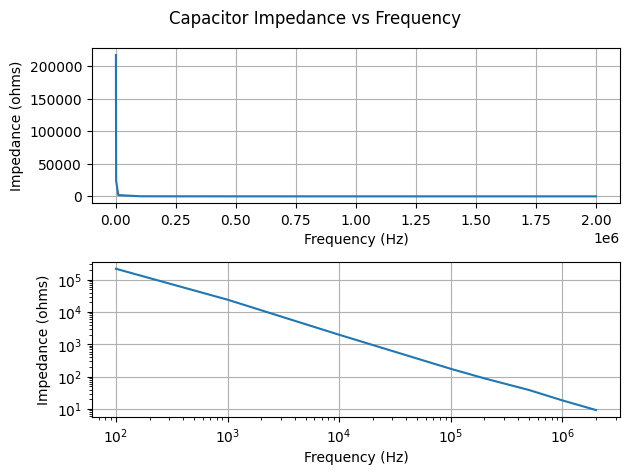

In [34]:
fig, (ax1, ax2) = plt.subplots(2)

fig.suptitle("Capacitor Impedance vs Frequency")

ax1.plot(freq, z)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (ohms)")
ax1.grid()
ax2.loglog(freq, z)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Impedance (ohms)")
ax2.grid()

fig.tight_layout()


## Problem 4

Since the plot is linear when the variables are both logarithmic, this implies:

$$ \log |Z| = m \log f + b $$

$$ \log |Z| = \log f^m + b $$

$$ b = \log C \implies \log |Z| = \log f^m + \log C $$

$$ \log |Z| = \log Cf^m \implies |Z| = Cf^m = \log (b) f^m $$

$$ \boxed{|Z| = 10^b f^m} $$

Using linear regression on the logarithmic data to find $m$ and $b$:

In [35]:
m, b = np.polyfit(np.log10(freq), np.log10(z), 1)
print(f"|Z| = {10**b:4e} * f^{m:4f}")


|Z| = 2.525705e+07 * f^-1.023904


The actual equation for the impedance (Wikipedia):

$$ Z = -\frac{j}{2\pi fC} $$

The fitted equation matches this perfectly. The constant multipler in the
equation, given a capacitance of 0.01 uF, is: 1.592e7. This is in the same order
of magnitude as the fitted constant multipler.


## Problem 5

The recorded values are in the table. They all agree with the frequency
settings.

## Problem 6

The recorded delta-T values and calculated differences (in degrees) are in the
table. Here is a sketch showing phase difference:

![Sketch 1](s1.png)

The phase difference is simply the length between t1 and t2. The amplitudes of
the waves don't matter.

## Problem 7

See table.

## Problem 8

The phase difference seems to be rotating from around 50 degrees, to 90 dgrees,
and back to 50 degrees. This is a consequence of the imaginary unit in the
equation causing the value of the impedance to rotate around the origin.

# Part 2

## Problem 1

The 1000 ohm resistor is used instead of the 100 ohm resistor.

![Inductor Circuit](ind_circuit.jpg)

![Inductor Oscilloscope](two.png)

## Problem 2


In [36]:
# Recorded and calculated data

freq = np.array([100, 1e3, 10e3, 100e3, 200e3, 500e3, 1e6, 2e6])  # Hz
v_in = np.array(
    [0.99828, 0.99939, 1.0021, 1.0037, 1.0024, 1.0032, 0.96045, 0.99312]
)  # V
v_l = np.array(
    [2.7184e-3, 6.8784e-3, 62.894e-3, 0.54319, 0.80415, 0.97846, 0.98653, 0.88126]
)  # V
v_r = np.array(
    [0.99560, 0.99625, 0.99640, 0.83851, 0.58079, 171.17e-3, 92.468e-3, 316.43e-3]
)  # V
i = v_r / 1000  # 1k ohms, instead of 100 ohms
z = v_l / i  # ohms
period = np.array(
    [
        9.9997e-3,
        1.0001e-3,
        100.05e-6,
        10.001e-6,
        5.0002e-6,
        1.9999e-6,
        0.99999e-6,
        0.50008e-6,
    ]
)  # s
delta_t = np.array(
    [430e-6, 167.9e-6, 26.45e-6, 4.05e-6, 2.39e-6, -828.4e-9, -338.5e-9, -146.0e-9]
)  # s
phase_diff = 360 * delta_t / period  # radians --> degrees

# Make table

headers = [
    "Frequency (Hz)",
    "V_in (V)",
    "V_L (V)",
    "V_R (V)",
    "I (A)",
    "Z (ohm)",
    "Period (s)",
    "Delta-T (s)",
    "Phase Diff. (degrees)",
]
table = zip(freq, v_in, v_l, v_r, i, z, period, delta_t, phase_diff)

print(tabulate(table, headers=headers))

  Frequency (Hz)    V_in (V)    V_L (V)    V_R (V)       I (A)      Z (ohm)    Period (s)    Delta-T (s)    Phase Diff. (degrees)
----------------  ----------  ---------  ---------  ----------  -----------  ------------  -------------  -----------------------
         100         0.99828  0.0027184   0.9956    0.0009956       2.73041    0.0099997       0.00043                    15.4805
        1000         0.99939  0.0068784   0.99625   0.00099625      6.90429    0.0010001       0.0001679                  60.438
       10000         1.0021   0.062894    0.9964    0.0009964      63.1212     0.00010005      2.645e-05                  95.1724
      100000         1.0037   0.54319     0.83851   0.00083851    647.804      1.0001e-05      4.05e-06                  145.785
      200000         1.0024   0.80415     0.58079   0.00058079   1384.58       5.0002e-06      2.39e-06                  172.073
      500000         1.0032   0.97846     0.17117   0.00017117   5716.31       1.9999e-06    

## Problem 3

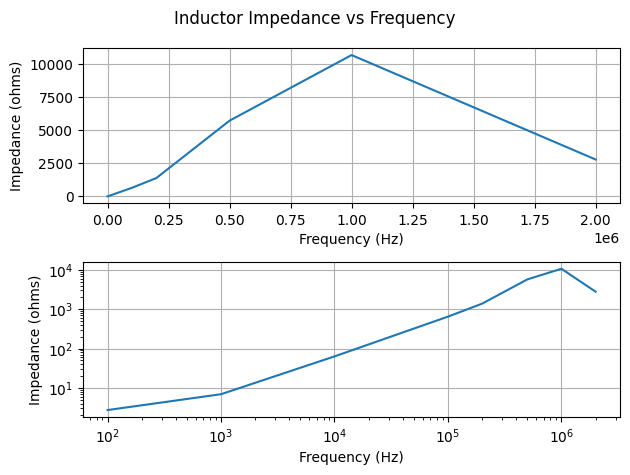

In [39]:
fig, (ax1, ax2) = plt.subplots(2)

fig.suptitle("Inductor Impedance vs Frequency")

ax1.plot(freq, z)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (ohms)")
ax1.grid()
ax2.loglog(freq, z)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Impedance (ohms)")
ax2.grid()

fig.tight_layout()


## Problem 4

Using the same math from the previous curve-fitting:

In [41]:
m, b = np.polyfit(np.log10(freq), np.log10(z), 1)
print(f"|Z| = {10**b:4e} * f^{m:4f}")

|Z| = 3.204617e-02 * f^0.863572


This is close, but not as close as the capacitor was to its equation, to the
actual impedance equation for an inductor:

$$ Z = 2\pi f L j $$

The constant multipler in the fitted equation is off, but the exponenet is at
least close to being 1.

## Problem 5

The recorded delta-T values and calculated differences (in degrees) are in the
table. Here is a sketch showing phase difference:

![Sketch 2](s2.png)

## Problem 6

The phase difference rotates up to 180 degrees than flips to -180 around 200 kHz
and begins going back to 0 degrees. The inductor's impedance equation doesn't
seem to imply a flip in the phase difference, but this is likely due to the
internal resistance of the inductor, since it requires a very long wire, or some
other factor coming from the fact that a non-ideal inductor was tested.

# Conclusion

The principles of impedance were all demonstrated here. There were issues
measuring the equation for the inductor, but this is likely due to it not being
an ideal inductor. The capacitor was much closer to the ideal and was therefore
easier to gather data on.


